In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from load_data import DATA_PATH, TARGET_LABELS, load_month

In [3]:
def dummies_to_decimal(row):
    output = ''
    for v in row.values:
        output += str(int(v))
    return log(int(output,2)+1)

In [4]:
df_1 = load_month(7, False)
df_2 = load_month(8, False)
df_3 = load_month(9, False)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2809: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Remove missing clients

In [7]:
clients = set(df_1['ncodpers'].unique())
clients &= set(df_2['ncodpers'].unique())
clients &= set(df_3['ncodpers'].unique())
clients = list(clients)
print len(clients), len(df_1['ncodpers'].unique())

840496 843195


In [8]:
df_1 = df_1[df_1['ncodpers'].isin(clients)]
df_2 = df_2[df_2['ncodpers'].isin(clients)]
df_3 = df_3[df_3['ncodpers'].isin(clients)]

In [9]:
print df_1.shape, df_2.shape, df_3.shape,

(840496, 45) (840496, 45) (840496, 45)


In [10]:
target_1 = df_1[TARGET_LABELS]
target_2 = df_2[TARGET_LABELS]
target_3 = df_3[TARGET_LABELS]

In [11]:
print target_1.shape, target_2.shape, target_3.shape

(840496, 24) (840496, 24) (840496, 24)


In [12]:
target_1.loc[:, 'target_value'] = target_1.apply(dummies_to_decimal, axis=1)
target_2.loc[:, 'target_value'] = target_2.apply(dummies_to_decimal, axis=1)
target_3.loc[:, 'target_value'] = target_3.apply(dummies_to_decimal, axis=1)

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


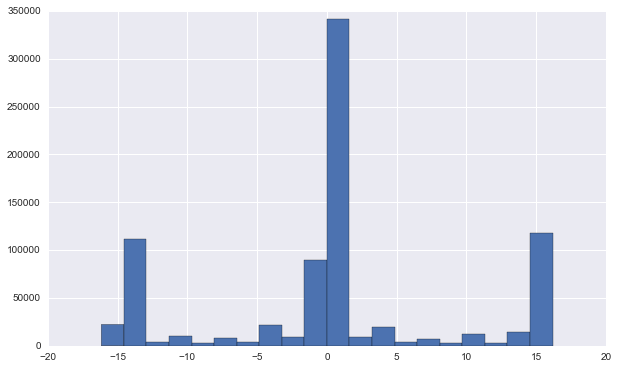

In [20]:
(target_2['target_value'] - target_1['target_value']).hist(bins=20)

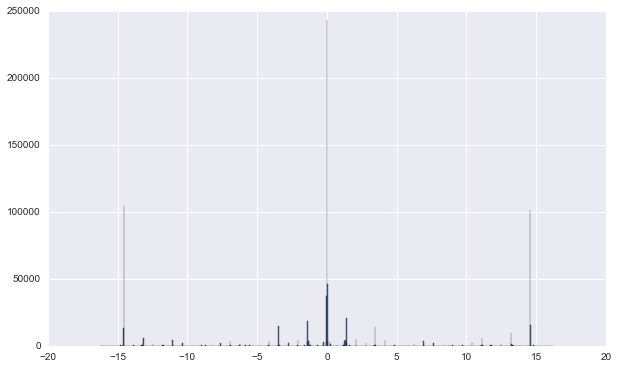

In [14]:
(target_3['target_value'] - target_2['target_value']).hist(bins=1000)

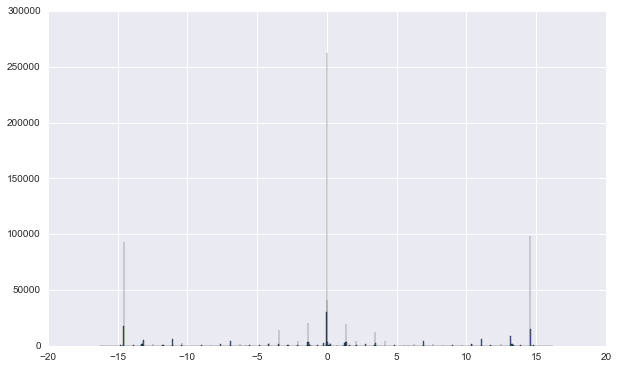

In [15]:
(target_3['target_value'] - target_1['target_value']).hist(bins=1000)

### Missing client data between months

In [52]:
print df_2['ncodpers'].isin(clients).sum() 
print df_3['ncodpers'].isin(clients).sum() 
missing_clients_1 = list(set(clients) - set(df_2['ncodpers'].unique()))
missing_clients_2 = list(set(clients) - set(df_3['ncodpers'].unique()))
print len(missing_clients_1), len(missing_clients_2)

841789
840507
1406 2688


In [46]:
df_1.loc[:, 'target_value'] = df_1[TARGET_LABELS].apply(dummies_to_decimal, axis=1) 
df_2.loc[:, 'target_value'] = df_2[TARGET_LABELS].apply(dummies_to_decimal, axis=1) 
df_3.loc[:, 'target_value'] = df_3[TARGET_LABELS].apply(dummies_to_decimal, axis=1)

In [66]:
#df_1[df_1['ncodpers'].isin(missing_clients_1[:15])]
df_1[df_1['ncodpers'].isin([1400219])]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
424332,2015-08-28,1400219,N,ES,V,41,2015-06-03,1,99,2015-08-26,...,0,0,0,0,0,0,0,0,11.774082,0.0


In [67]:
df_2[df_2['ncodpers'].isin([1400219])]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value


In [63]:
df_3[df_3['ncodpers'].isin(missing_clients_1)].head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
128390,2015-10-28,1004795,N,ES,V,48,2012-02-10,1,99,2015-10-26,...,0,0,0,0,0,0,0,0,11.153166,0.000000
232190,2015-10-28,1400219,N,ES,V,41,2015-06-03,1,1,UNKNOWN,...,0,0,0,0,0,0,0,0,11.898262,14.556091
235988,2015-10-28,1404778,N,ES,V,42,2015-07-06,1,1,UNKNOWN,...,0,0,0,0,0,0,0,0,-99.000000,0.000000
238697,2015-10-28,1428721,N,ES,H,81,2015-08-05,1,1,UNKNOWN,...,0,0,0,0,0,0,0,0,11.896717,14.556091
265943,2015-10-28,1393783,N,ES,H,54,2015-04-23,1,99,2015-10-20,...,0,0,0,0,0,0,0,0,11.822940,0.000000


In [28]:
print (df_1['target_value'] == 0).sum()
df_1[df_1['target_value'] == 0].head()

15812


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
43,2015-01-28,1050680,N,ES,V,53,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.798806,0.0
46,2015-01-28,1050693,N,ES,V,37,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.552493,0.0
388,2015-01-28,1050141,N,ES,V,22,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,10.868984,0.0
532,2015-01-28,1050389,N,ES,V,35,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.986299,0.0
543,2015-01-28,1050337,N,ES,H,31,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,10.111542,0.0


In [29]:
print (df_2['target_value'] == 0).sum()
df_2[df_2['target_value'] == 0].head()

15880


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
24,2015-02-28,544557,N,ES,H,49,2005-08-01,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.856514,0.0
64,2015-02-28,545035,N,ES,V,46,2008-10-09,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,12.581865,0.0
66,2015-02-28,545033,N,ES,V,56,2005-08-02,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,-99.000000,0.0
114,2015-02-28,545223,N,ES,V,49,2005-08-03,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.101992,0.0
156,2015-02-28,544676,N,ES,V,39,2005-08-01,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,10.774338,0.0


In [34]:
df_1[df_1['ncodpers'] == 1050680]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
43,2015-01-28,1050680,N,ES,V,53,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.798806,0.0


In [35]:
df_2[df_2['ncodpers'] == 1050680]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
611835,2015-02-28,1050680,N,ES,V,53,2012-08-10,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.798806,0.0


In [36]:
df_1[df_1['ncodpers'] == 544557]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
611112,2015-01-28,544557,N,ES,H,49,2005-08-01,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.856514,0.0


In [37]:
df_2[df_2['ncodpers'] == 544557]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta,target_value
24,2015-02-28,544557,N,ES,H,49,2005-08-01,0,1.0,UNKNOWN,...,0,0,0,0,0,0.0,0.0,0,11.856514,0.0


In [11]:
diff = (target_2 - target_1)
diff.describe()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.000012,0.000012,-0.001500,-0.000032,0.001376,-0.000312,-0.000668,0.000060,-0.000260,0.000748,...,-0.000040,-0.000072,-0.000060,0.000388,-0.002168,-0.000296,-0.000080,0.002276,0.001540,-0.002572
std,0.016613,0.008246,0.602962,0.031749,0.419789,0.156691,0.160361,0.582482,0.340359,0.073399,...,0.127279,0.155461,0.082195,0.341017,0.331825,0.253520,0.101902,0.348975,0.366161,0.514757
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
